In [ ]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from utils import HELMConverter, draw_mol, get_main_mol, remove_isotopes, is_same_mol

lib_files = [
    "chembl_35_monomer_library.xml",
    "chembl_35_monomer_library_diff.xml",
    "HELMCoreLibrary.json",
    "monomerLib2.0.json"
]
converter = HELMConverter().load(*[repo_root + f"data/helm/library/{name}" for name in lib_files])

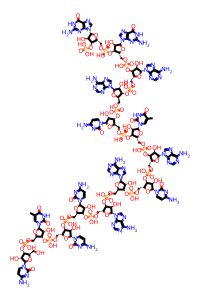

In [3]:
helm = "RNA1{R(C)P.R(T)P.R(C)P.R(C)P.R(A)P.R(A)P.R(C)P.R(A)P.R(T)P.R(C)P.R(A)P.R(A)P.R(G)P.R(G)P}$$$$"

mol = converter._convert(helm, verbose=True)
draw_mol(mol, 200, 300)

True
CSCC[C@H](NC(=O)[C@H](CC(C)C)NP(=O)(O)O[C@H]1[C@@H](O)[C@H](n2cnc3c(N)ncnc32)O[C@@H]1COP(=O)(O)O[C@H]1[C@@H](O)[C@H](n2ccc(N)nc2=O)O[C@@H]1CO)C(=O)C(=O)C1CCC(CN2C(=O)CCC2=O)CC1 ...helm -> smiles
CSCC[C@H](NC(=O)[C@H](CC(C)C)NP(=O)(O)O[C@H]1[C@@H](O)[C@H](n2cnc3c(N)ncnc32)O[C@@H]1COP(=O)(O)O[C@H]1[C@@H](O)[C@H](n2ccc(N)nc2=O)O[C@@H]1CO)C(=O)C(=O)C1CCC(CN2C(=O)CCC2=O)CC1 ...smiles -> smiles
CC(C)C[C@@H](C(=O)N[C@@H](CCSC)C(=O)C(=O)C1CCC(CC1)CN2C(=O)CC([H])C2=O)NP(=O)(O)O[C@@H]3[C@@H](COP(=O)(O)O[C@@H]4[C@@H](CO[H])O[C@H]([C@@H]4O)N5C=CC(=NC5=O)N)O[C@H]([C@@H]3O)N6C=NC7=C6N=CN=C7N ...raw


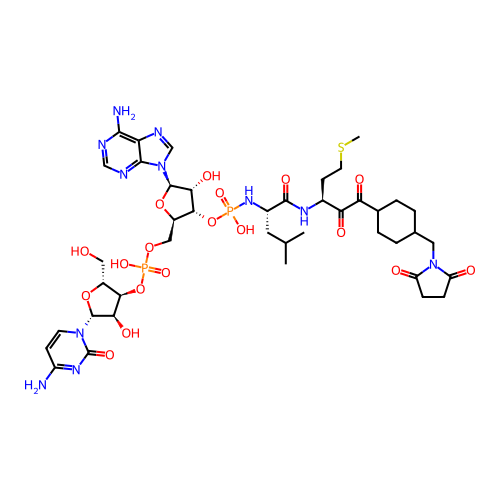

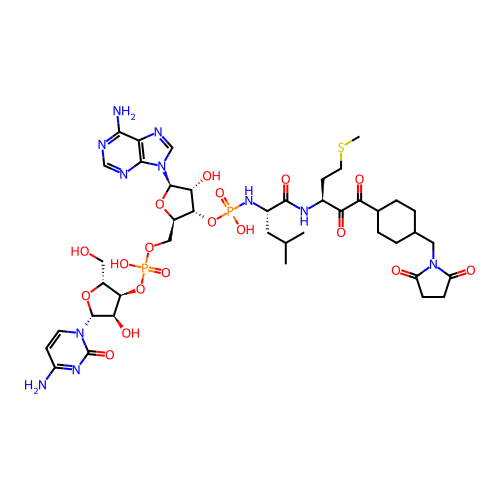

In [4]:
helm, smiles = "CHEM1{[SMCC]}|PEPTIDE1{L.M}|RNA1{R(C)P.R(A)P}$RNA1,PEPTIDE1,6:R2-1:R1|PEPTIDE1,CHEM1,2:R2-1:R1$$$", "CC(C)C[C@@H](C(=O)N[C@@H](CCSC)C(=O)C(=O)C1CCC(CC1)CN2C(=O)CC([H])C2=O)NP(=O)(O)O[C@@H]3[C@@H](COP(=O)(O)O[C@@H]4[C@@H](CO[H])O[C@H]([C@@H]4O)N5C=CC(=NC5=O)N)O[C@H]([C@@H]3O)N6C=NC7=C6N=CN=C7N"

mol_helm = converter.convert(helm)
mol_helm = Chem.RemoveHs(mol_helm)
# mol_smiles = standardize_mol(Chem.MolFromSmiles(smiles))
mol_smiles = Chem.MolFromSmiles(smiles)

width = 500
height = 500

print(is_same_mol(mol_helm, mol_smiles))
print(Chem.MolToSmiles(mol_helm) + " ...helm -> smiles")
print(Chem.MolToSmiles(mol_smiles) + " ...smiles -> smiles")
print(smiles + " ...raw")

draw_mol(mol_helm, width, height)
draw_mol(mol_smiles, width, height)

*NCC[C@H](N*)C(*)=O


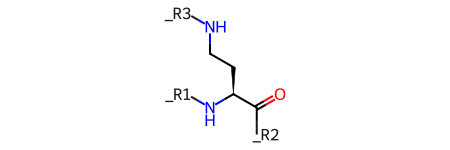

In [5]:
# helm = "CHEM1{[SMCC]}$$$$"
helm = "PEPTIDE1{[Dab]}$$$$"
mol = converter._convert(helm, close=False)
print(Chem.MolToSmiles(mol))
mol

In [12]:
#test converter

import cProfile
import csv

test_data: list[tuple] = []
file_path = repo_root + "data/helm/chembl34_protein_helm.csv"
#file_path = molgen_path + "data/helm/pa_test.csv"

with open(file_path, newline='', encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)    # skip header
    for row in reader:
        test_data.append(tuple(row))

def test():
    success_count = 0
    unmatch_count = 0
    none_count = 0
    for helm, id, smiles in test_data:
        mol1 = converter.convert(helm)
        mol2 = Chem.MolFromSmiles(smiles)
        mol2 = remove_isotopes(mol2)
        mol2 = get_main_mol(mol2)

        if mol1 is None:
            none_count += 1
            print("None - helm: " + helm + ", smiles: " + smiles)
        elif is_same_mol(mol1, mol2):
            success_count += 1
        else:
            unmatch_count += 1
            print("Unmatch - helm: " + helm + ", smiles: " + smiles)
    print("success_count: " + str(success_count) + ", none_count: " + str(none_count) + " unmatch_count: " + str(unmatch_count))

#cProfile.run("test()")
test()

Unmatch - helm: PEPTIDE1{[X1590].L.F}$$$$, smiles: C=C(C)NC(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C(=O)O
Unmatch - helm: PEPTIDE1{[Boc_K].[X2362].I.L}$$$$, smiles: CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)N/C=C/C(=O)[C@@H]1CCCN1C(=O)[C@H](CCCCN)NC(=O)OC(C)(C)C)C(=O)N[C@@H](CC(C)C)C(=O)O
Unmatch - helm: PEPTIDE1{G.C.C.S.[X575].[dP].A.C.A.N.N.Q.D.Y.C.[am]}$$$$, smiles: C[C@H](NC(=O)[C@H](CS)NC(=O)[C@H](C)NC(=O)[C@H]1CCCN1C(=O)[C@H](CC1=CNCN1)NC(=O)[C@H](CO)NC(=O)[C@H](CS)NC(=O)[C@H](CS)NC(=O)CN)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CS)C(N)=O
Unmatch - helm: PEPTIDE1{[X1402].[meW].[d2-Pal].[Sar]}$$$$, smiles: CC(C)C[C@@H](NC(=O)N1CCCCCC1)C(=O)N(C)[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](Cc1ccccn1)C(=O)N(C)CC(=O)[O-].[Na+]
Unmatch - helm: PEPTIDE1{[X1402].[meW].[d2-Pal].F}$$$$, smiles: CC(C)C[C@@H](NC(=O)N1CCCCCC1)C(=O)N(C)[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](Cc1ccccn1)C(=O)N[C@@H](Cc1ccc

[15:56:44] SMILES Parse Error: syntax error while parsing: dLys(Ac)2
[15:56:44] SMILES Parse Error: check for mistakes around position 1:
[15:56:44] dLys(Ac)2
[15:56:44] ^
[15:56:44] SMILES Parse Error: Failed parsing SMILES 'dLys(Ac)2' for input: 'dLys(Ac)2'
[15:56:44] SMILES Parse Error: syntax error while parsing: dLys(BrAc)2
[15:56:44] SMILES Parse Error: check for mistakes around position 1:
[15:56:44] dLys(BrAc)2
[15:56:44] ^
[15:56:44] SMILES Parse Error: Failed parsing SMILES 'dLys(BrAc)2' for input: 'dLys(BrAc)2'


None - helm: PEPTIDE1{Y.[dLys(Ac)2].F.G.Y.P.S}$$$$, smiles: CC(=O)N(CCC[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(=O)O)C(C)=O
None - helm: PEPTIDE1{Y.[dLys(BrAc)2].F.G.Y.P.S}$$$$, smiles: N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@H](CCCCN(C(=O)CBr)C(=O)CBr)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].I.S.Q.L.[X54]}$$$$, smiles: CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C/C=C/S(C)(=O)=O)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].I.S.Q.L.[X886]}$$$$, smiles: CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C/C=C/C(C)=O)C(=O)O
Unmatch - helm: PEPTIDE1{[ac].[X11].H.[dF].[dR].[am]}$$$$, smiles: CC(=O)N/C(=C\c1ccccc1)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N[C@H](Cc1ccccc1)C(=O)N[C@H](CCCNC(=N)N)C(N)=O
Unmatch - helm: PEPTIDE1{[Abu].[Sar].[meL].V.[meL].A.[dA].[me

[15:57:13] SMILES Parse Error: syntax error while parsing: Hpr_OMe
[15:57:13] SMILES Parse Error: check for mistakes around position 1:
[15:57:13] Hpr_OMe
[15:57:13] ^
[15:57:13] SMILES Parse Error: Failed parsing SMILES 'Hpr_OMe' for input: 'Hpr_OMe'
[15:57:13] SMILES Parse Error: syntax error while parsing: Hpr_OMe
[15:57:13] SMILES Parse Error: check for mistakes around position 1:
[15:57:13] Hpr_OMe
[15:57:13] ^
[15:57:13] SMILES Parse Error: Failed parsing SMILES 'Hpr_OMe' for input: 'Hpr_OMe'


None - helm: PEPTIDE1{E.H.[Hpr_OMe]}$$$$, smiles: COC(=O)[C@@H]1CCCCN1C(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H](N)CCC(=O)O
None - helm: PEPTIDE1{[X22].H.[Hpr_OMe]}$$$$, smiles: COC(=O)[C@@H]1CCCCN1C(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H]1CCCC(=O)N1
Unmatch - helm: PEPTIDE1{[X1760].[Abu].[Sar].[meL].[dV].[Sar].A.[dA].[Me_dL].[Me_dL].[Me_dV]}$PEPTIDE1,PEPTIDE1,11:R2-1:R1$$$, smiles: C/C=C/C[C@@H](C)[C@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)CC(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](C(C)C)C(=O)N1C
Unmatch - helm: PEPTIDE1{[X2064].[dS].[Nle].[dY].[dS].[dC].F.[dW].[Orn].T.[dC].T.[am]}$PEPTIDE1,PEPTIDE1,11:R3-6:R3$$$, smiles: CCCC[C@H](NC(=O)[C@@H](CO)NC(=O)CN(CCN)C(=O)Oc1cc(/C=C\c2cc(OC)c(OC)c(OC)c2)ccc1OC)C(=O)N[C@H](Cc1ccc(O)cc1)C(=O)N[C@H](CO)C(=O)N[C@@H]1CSSC[C@H](C(=O)N[C@H](C(N)=O)[C@@H](C)O)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC1=O
Unmatch - helm